In [75]:
import pandas as pd
import requests
import json
import random
import seaborn as sns

In [51]:
qtd_nomes = 60

nomes = requests.get(f'https://gerador-nomes.wolan.net/nomes/{qtd_nomes}')
valor_nomes = json.loads(nomes.content)

In [52]:
lista_notas = []
disciplinas = []
for i in range(qtd_nomes):
    lista_notas.append(round(random.uniform(1,10),2))
    disciplinas.append(random.choice(['MAT', 'CIE', 'GEO', 'HIS', 'POR']))

In [54]:
df = pd.DataFrame({
    'nome':valor_nomes,
    'disciplina':disciplinas,
    'nota':lista_notas
})


In [59]:
df['situacao'] = df['nota'].apply(lambda row: 'abaixo da média' if row < 7 else 'dentro da média')
df.head()

,nome,disciplina,nota,situacao
0,Gabrielly,HIS,2.74,abaixo da média
1,Alex,GEO,8.35,dentro da média
2,Teresa,POR,5.21,abaixo da média
3,Enzo,MAT,8.59,dentro da média
4,Artyom,HIS,1.65,abaixo da média


In [83]:
agrupado = df.groupby(['disciplina', 'situacao']).count()
agrupado = agrupado.reset_index()
agrupado = agrupado.rename(columns={'nome':'qtd'})
agrupado = agrupado[['disciplina', 'situacao', 'qtd']]
agrupado

,disciplina,situacao,qtd
0,CIE,abaixo da média,9
1,CIE,dentro da média,3
2,GEO,abaixo da média,9
3,GEO,dentro da média,2
4,HIS,abaixo da média,9
5,HIS,dentro da média,1
6,MAT,abaixo da média,8
7,MAT,dentro da média,2
8,POR,abaixo da média,14
9,POR,dentro da média,3


<Axes: xlabel='disciplina', ylabel='qtd'>

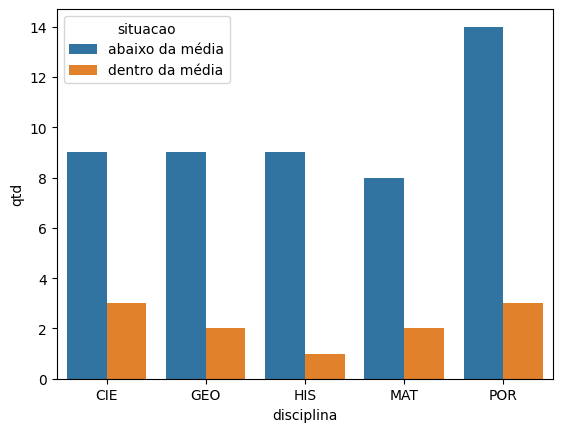

In [85]:
sns.barplot(agrupado, x = 'disciplina', y = 'qtd', hue='situacao')